In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
import re
import string
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib import pyplot as plt
import scipy.spatial.distance as ssd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
import codecs
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import seaborn as sns

In [2]:
from assn1_1 import tokenize_stem as ts
from assn1_1 import get_text
from assn1_1 import fancy_dendrogram as fdendo

In [3]:
s = "msc-plagiarism-assigment/ass1-"
l = ["1349","422","734","808","936","1019","1037","1046","1138","1147","202","211","321","440","505","532","541","606","743","817","826","909"]
filenames = [s+item+".txt" for item in l]    

In [4]:
filenames[0]

'msc-plagiarism-assigment/ass1-1349.txt'

In [5]:
texts = []
for names in filenames:
    texts.append(get_text(names))

In [6]:
vectorizer = TfidfVectorizer(tokenizer=ts,max_df=0.5,lowercase=True,smooth_idf=True)

In [7]:
tfidf_model = vectorizer.fit_transform(texts)

In [8]:
tfidf_model.shape

(22, 1628)

In [9]:
svd_model = TruncatedSVD(n_components=4, algorithm='randomized', n_iter=200)

In [10]:
svd_model.fit(tfidf_model)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=200,
       random_state=None, tol=0.0)

In [11]:
len(svd_model.components_)

4

In [14]:
terms = vectorizer.get_feature_names()
type(terms)
print(terms[:10])
#terms.index("�")

['aaron', 'abil', 'abl', 'abstract', 'accept', 'access', 'acclaim', 'accord', 'accuraci', 'achiev']


In [15]:
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print("")

Topic 0: 
market
menu
type
aliweb
looksmart

Topic 1: 
netscap
menu
five
aliweb
instead

Topic 2: 
purchas
looksmart
wisenut
dogpil
own

Topic 3: 
market
netscap
five
year
function



In [16]:
reduced_tfidf = svd_model.transform(tfidf_model)

In [17]:
reduced_tfidf.shape

(22, 4)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
cs = cosine_similarity(reduced_tfidf)
ds = cosine_similarity(reduced_tfidf)

In [58]:
max1= -1
for i in range(ds.shape[0]):
    for j in range(ds.shape[1]):
        if(i!= j  and cs[i][j] >= max1):
            max1 = cs[i][j]
            print(max1,i,j)
#mini

-0.059063045602222725 0 1
0.049835174602063936 0 2
0.9752355594051069 0 4
0.9918836131231119 1 13
0.9971114459651299 5 11
0.9980183836092235 6 16
0.9980183836092235 16 6


In [63]:
cs[1][13]

0.9918836131231119

In [65]:
for i in range(ds.shape[0]):
    for j in range(ds.shape[1]):
        #cs[i][j] = round(cs[i][j],4)
        if(i==j):
            ds[i][j]=0
        else:
            ds[i][j] = 1-cs[i][j]

In [45]:
ds.shape

(22, 22)

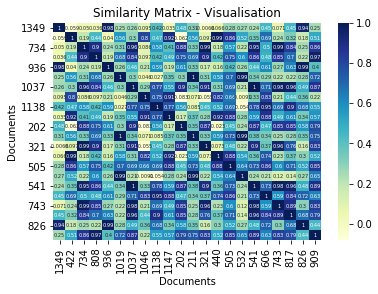

In [46]:
"""
Similarity matrix visualisation
"""
df = pd.DataFrame(cs,columns=l,index=l)
plt.title('Similarity Matrix - Visualisation')
ax = sns.heatmap(df,annot=True,annot_kws={"size":5},cmap="YlGnBu")
ax.set(xlabel="Documents",ylabel="Documents")
plt.show()
   

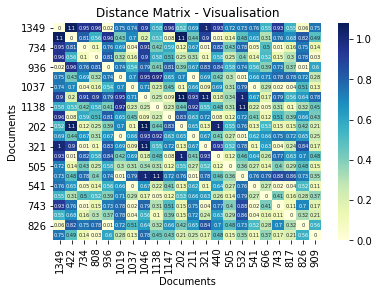

In [21]:
"""
distance matrix visualisation
"""
df1 = pd.DataFrame(ds,columns=l,index=l)
plt.title('Distance Matrix - Visualisation')
ax = sns.heatmap(df1,annot=True,annot_kws={"size":5},cmap="YlGnBu")
ax.set(xlabel="Documents",ylabel="Documents")
plt.show()


(231,)


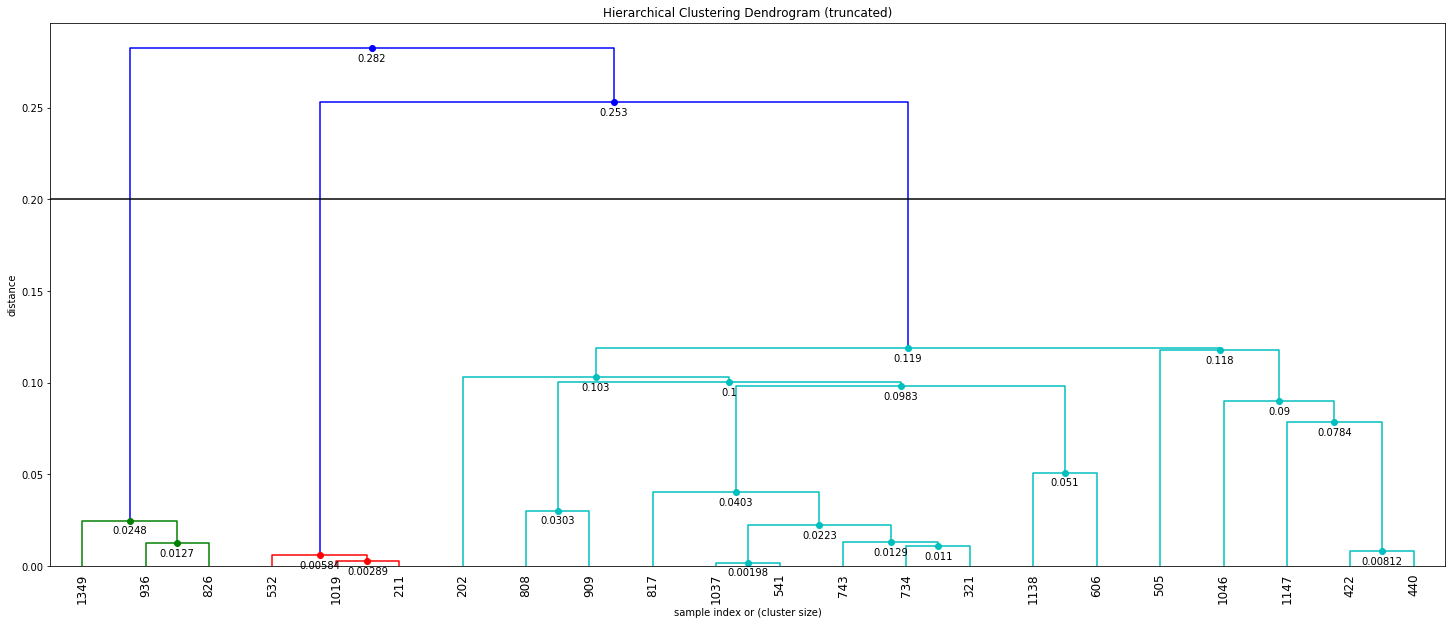

In [69]:
distArray = ssd.squareform(ds)
print(distArray.shape)
Z = linkage(distArray,method="single")
fig = plt.figure(figsize=(25, 10))
    
    
fdendo(Z,
    labels = l,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    max_d=.2
)
    #dn = dendrogram(Z,labels=l)
#plt.savefig("dendro-2c")
plt.show()